Using Autoencoders

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
train_df = pd.read_csv("../data/train1.csv", parse_dates=["date"])
train_df = train_df.sort_values("date").reset_index(drop=True)

test_df = pd.read_csv("../data/test1.csv", parse_dates=["date"])
test_df = test_df.sort_values("date").reset_index(drop=True)

In [4]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(train_df[["hours"]])
model = Sequential([
    Dense(4, activation='relu', input_shape=(1,)),  # encoder
    Dense(2, activation='relu'),
    Dense(4, activation='relu'),  # decoder
    Dense(1, activation='linear')
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, X_train, epochs=200, batch_size=4, verbose=0)


d:\anomlay detection\myenv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
X_test = scaler.transform(test_df[["hours"]])

X_pred = model.predict(X_test)
test_df["reconstruction_error"] = np.abs(X_test.flatten() - X_pred.flatten())

threshold = np.percentile(test_df["reconstruction_error"], 95)  
test_df["anomaly"] = test_df["reconstruction_error"] > threshold
print(test_df[["date", "hours", "reconstruction_error", "anomaly"]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
         date  hours  reconstruction_error  anomaly
0  2026-07-01    2.5              0.121357    False
1  2026-07-02    2.6              0.078643    False
2  2026-07-03    2.4              0.321357    False
3  2026-07-04    2.7              0.278643    False
4  2026-07-05    2.5              0.121357    False
5  2026-07-06    1.2              2.396228     True
6  2026-07-07    2.6              0.078643    False
7  2026-07-08    3.3              1.478643    False
8  2026-07-09    2.5              0.121357    False
9  2026-07-10    2.6              0.078643    False
10 2026-07-11    2.4              0.321357    False
11 2026-07-12    2.7              0.278643    False
12 2026-07-13    2.5              0.121357    False
13 2026-07-14    2.6              0.078643    False
14 2026-07-15    2.5              0.121357    False
15 2026-07-16    0.9              2.914946     True
16 2026-07-17    2.6              0.078643    False
17 2026-07-18    2.5      

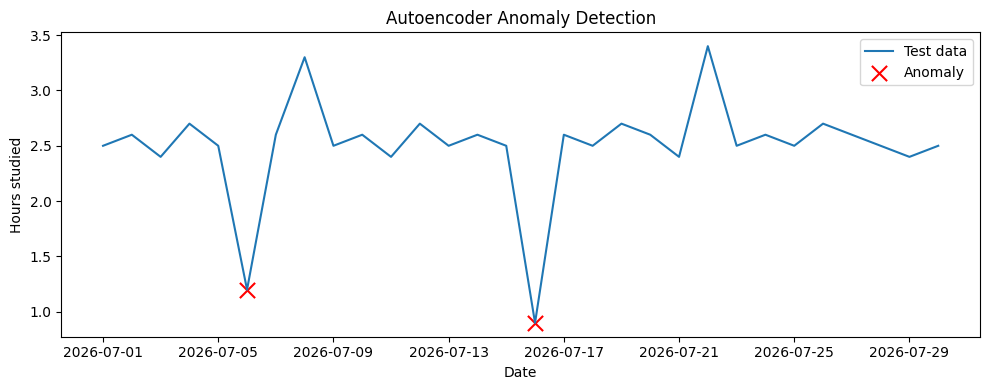

In [7]:
plt.figure(figsize=(10,4))
plt.plot(test_df["date"], test_df["hours"], label="Test data")
plt.scatter(
    test_df.loc[test_df["anomaly"], "date"],
    test_df.loc[test_df["anomaly"], "hours"],
    s=120, marker="x", color="red", label="Anomaly"
)
plt.xlabel("Date")
plt.ylabel("Hours studied")
plt.title("Autoencoder Anomaly Detection")
plt.legend()
plt.tight_layout()
plt.show()